# Predicting Final Grade

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

## Introduction

For this project, we're conducting a multi-variable regression analysis on the *Student Performance* dataset. 

There are many reasons why people may care about their grade. A student may want to get into a prestigious university where the entrance requirement is very high. Alternatively, it may be as simple as getting the satisfaction of seeing a high mark on your report card. Being able to accurately predict your grade allows you to plan in advance to determine if you need extra assistance in a particular subject, or if you are currently on track to meet or exceed the grade you desire. Unfortunately, this is not an easy task. There are many potential factors that can affect your performance, and given that each student has their own unique circumstances, this makes the task of predicting monumental. On the other hand, there are also many features that are common among students, and serves as a common ground in being able to predict your final grade.

The original dataset, which was recorded on the UCI ML Repo (see citation), was split into two individual datasets, respectively with students' final grades in Portuguese and Math. For this project, we're only focusing on the Math dataset. First used in 2008 by Cortez and Silva, this dataset was collected for use in decision trees, neural networks, SVMs and Random Forest. The dataset has an very large number of potentially useful features. There are 30 features and 3 outputs; however, for the purposes of this analysis, we will only focus on 7 features with varying levels of intuitive correlation with the final end of year grade G3. For instance, the feature "study time", at a glance, seems like there will be a positive correlation with final grade while the feature "free time" is not as straightforward to tell. 

The dataset we will be using contains the following features (the type of feature is given by the UCI ML Repo):
 * study time: The number of hours spend studying per week. It is a numeric feature where each number is associated with a range of hours spent studying (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).
 * Pstatus: Whether the parents of the student are currently living together or seperated (Binary feature: T = living together, A = apart)
 * Medu: Numeric representations of the mother's education level  (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
 * Fedu: Numeric representations of the father's education level  (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
 * Mjob: The mother's job (Categorical: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 * Fjob: The father's job (Categorical: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 * goout: A representation of how often the student goes out with friends (numeric: from 1 - very low to 5 - very high)
 
Thus, we are interested in looking to answer the following question: **Can we predict a student's final grade (denoted by "G3" in the dataset) given the above features**.


## EDA

In [2]:
df = pd.read_csv("data/student-mat.csv",sep = ";")
pd.set_option("display.max_rows", 3, "display.max_columns", None)
df.iloc[:2]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6


Since we have quite a few (namely, 30) variables to choose from, we first make a simple scatterplot to see how our target (G3) looks like comparing to a numerical variable(study time)

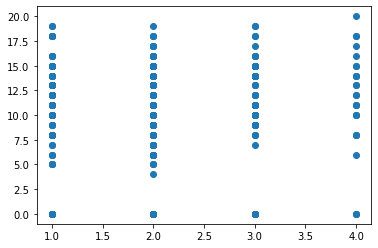

In [3]:
plt.scatter(df.studytime, df.G3)


## Methods

Since what we are trying to predict is a quantitative varible based on several variables, it is clear we are aiming for regression analysis. Particularly, the regresion methods from DSCI 110 were knn and least square, where we think the best of the two may be least squares regression. This is namely due to the fact that we hueristically expect quite linear result from many of these variables. 
 Since we will be only using a specific subset of the varibales use in the dataset then we need not explain all variables possibles in the dataset and rather explain why we are choosing the variables we are. 


## Results


...

## Discussion:

...

## Citations

Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository.

Cortez & Silva (2008). Using data mining to predict secondary school student performance. EUROSIS. 